In [1]:
!wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip
!unzip -q household_power_consumption.zip

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,TimeStamp
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,2006-12-16 17:24:00
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,2006-12-16 17:25:00
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,2006-12-16 17:26:00
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,2006-12-16 17:27:00
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,2006-12-16 17:28:00


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tools.plotting import autocorrelation_plot
%matplotlib inline
#
df = pd.read_csv('household_power_consumption.txt',sep=';')
#
df['TimeStamp'] = df['Date']+' '+df['Time']
df['TimeStamp'] = pd.to_datetime(df['TimeStamp'],format = "%d/%m/%Y %H:%M:%S")
df.index = df['TimeStamp']
df.index.name = None
df = df.drop(['Date','Time'],axis = 1)
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,TimeStamp
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,2006-12-16 17:24:00
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,2006-12-16 17:25:00
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,2006-12-16 17:26:00
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,2006-12-16 17:27:00
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,2006-12-16 17:28:00


In [4]:
#@title Default title text
df = df.convert_objects(convert_numeric=True)
df = df.ffill()
#
newdf = df[['Global_active_power']]
newdf.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


,Global_active_power
2006-12-16 17:24:00,4.216
2006-12-16 17:25:00,5.360
2006-12-16 17:26:00,5.374
2006-12-16 17:27:00,5.388
2006-12-16 17:28:00,3.666


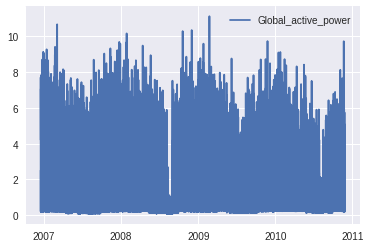

In [5]:
newdf.plot()

# **Summary Statistics**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8d8b48b048>]],
      dtype=object)

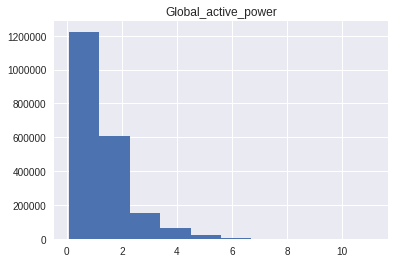

In [6]:
newdf.hist()

In [7]:
#comparison of mean and variance by splitting in two parts
X = newdf.values
split = len(X)//2
X1, X2 = X[0:split],X[split:]
mean1,mean2 = X1.mean(),X2.mean()
var1,var2 = X1.var(),X2.var()
print("mean1 = %f , mean2 = %f"%(mean1,mean2))
print("var1 = %f , var2 = %f"%(var1,var2))

mean1 = 1.102442 , mean2 = 1.069895
var1 = 1.270590 , var2 = 0.947222


In [8]:
#comparison of mean and variance by splitting in three parts
X = newdf.values
split = len(X)//3
X1,X2,X3 = X[0:split],X[split:2*split],X[2*split:]
print(X1.shape)
print(X2.shape)
print(X3.shape)
mean1,mean2,mean3 = X1.mean(),X2.mean(),X3.mean()
var1,var2,var3 = X1.var(),X2.var(),X3.var()
print("mean1 = %f , mean2 = %f , mean3 = %f"%(mean1,mean2,mean3))
print("var1 = %f , var2 = %f , var3 = %f"%(var1,var2,var3))

(691753, 1)
(691753, 1)
(691753, 1)
mean1 = 1.174378 , mean2 = 1.019858 , mean3 = 1.064269
var1 = 1.391620 , var2 = 1.004866 , var3 = 0.918369


In [9]:
#comparison of mean and variance by splitting in four parts
X = newdf.values
split = len(X)//4
X1,X2,X3,X4 = X[0:split],X[split:2*split],X[2*split:3*split],X[3*split:]
print(X1.shape)
print(X2.shape)
print(X3.shape)
print(X4.shape)
mean1,mean2,mean3,mean4 = X1.mean(),X2.mean(),X3.mean(),X4.mean()
var1,var2,var3,var4 = X1.var(),X2.var(),X3.var(),X4.var()
print("mean1 = %f , mean2 = %f , mean3 = %f , mean4 = %f"%(mean1,mean2,mean3,mean4))
print("var1 = %f , var2 = %f , var3 = %f , var4 = %f"%(var1,var2,var3,var4))

(518814, 1)
(518814, 1)
(518814, 1)
(518817, 1)
mean1 = 1.115680 , mean2 = 1.089202 , mean3 = 1.063143 , mean4 = 1.076648
var1 = 1.354179 , var2 = 1.186653 , var3 = 1.001379 , var4 = 0.892973


In [10]:
#applying log transformation
from numpy import log
X = newdf.values
X = np.log(X)
split = len(X)//2
X1, X2 = X[0:split],X[split:]
mean1,mean2 = X1.mean(),X2.mean()
var1,var2 = X1.var(),X2.var()
print("mean1 = %f , mean2 = %f"%(mean1,mean2))
print("var1 = %f , var2 = %f"%(var1,var2))

mean1 = -0.400318 , mean2 = -0.323461
var1 = 1.043138 , var2 = 0.811245


# **Augmented Dickey-Fuller test or Unit root test**

In [0]:
X = newdf['Global_active_power'].values

In [12]:
print(X)

[4.216 5.36  5.374 ... 0.938 0.934 0.932]


In [13]:
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [0]:
result = adfuller(X[0:len(X)//100], maxlag=None, autolag='BIC', regression='c')

In [16]:
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -11.029448
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
